In [1]:
!pip install ucimlrepo

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [118]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
X = adult.data.features 
Y = adult.data.targets

In [119]:
# metadata 
print(adult.metadata)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [120]:
# variable information 
print(adult.variables)

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [121]:
print(X)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [122]:
print(Y)

       income
0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
...       ...
48837  <=50K.
48838  <=50K.
48839  <=50K.
48840  <=50K.
48841   >50K.

[48842 rows x 1 columns]


In [123]:
df = pd.DataFrame(data=X, columns=adult.data.feature_names)
df['income'] = Y

In [124]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [126]:
for i in df.columns:
    print("Column : ", i, ", Missing Values : ", df.loc[df[i] == "?", i].size)

df['income'].value_counts()

Column :  age , Missing Values :  0
Column :  workclass , Missing Values :  1836
Column :  fnlwgt , Missing Values :  0
Column :  education , Missing Values :  0
Column :  education-num , Missing Values :  0
Column :  marital-status , Missing Values :  0
Column :  occupation , Missing Values :  1843
Column :  relationship , Missing Values :  0
Column :  race , Missing Values :  0
Column :  sex , Missing Values :  0
Column :  capital-gain , Missing Values :  0
Column :  capital-loss , Missing Values :  0
Column :  hours-per-week , Missing Values :  0
Column :  native-country , Missing Values :  583
Column :  income , Missing Values :  0


income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [127]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [128]:
temp_df = df.loc[((df["occupation"] == "?") & (df["workclass"] == "?")), :]
len(temp_df)

1836

Where occupation is missing, workclass is missing too

In [129]:
df_extra_col = df.copy()
df_extra_col.loc[df_extra_col["workclass"] == "?", "workclass.missing"] = 1
df_extra_col.loc[df_extra_col["workclass"] != "?", "workclass.missing"] = 0

df_extra_col.head(100)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass.missing
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,<=50K,0.0
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K,0.0
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K,0.0
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K,0.0


In [130]:
# check for missing values in the dataset
if df.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values in the dataset.")

There are missing values in the dataset.


In [131]:
# Missing values
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [132]:
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])

In [133]:
# Fill missing numerical values with the mean (consider other strategies if needed)
imputer = SimpleImputer(strategy='mean')
df[['age', 'income', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = imputer.fit_transform(df[['age', 'income', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

In [134]:
df.duplicated().sum()

29

drop duplicated entries

In [135]:
df.drop_duplicates(inplace=True)

In [136]:
df.duplicated().sum()

0

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48813 non-null  float64
 1   workclass       47850 non-null  object 
 2   fnlwgt          48813 non-null  float64
 3   education       48813 non-null  object 
 4   education-num   48813 non-null  float64
 5   marital-status  48813 non-null  object 
 6   occupation      47847 non-null  object 
 7   relationship    48813 non-null  object 
 8   race            48813 non-null  object 
 9   sex             48813 non-null  object 
 10  capital-gain    48813 non-null  float64
 11  capital-loss    48813 non-null  float64
 12  hours-per-week  48813 non-null  float64
 13  native-country  48539 non-null  object 
 14  income          48813 non-null  float64
dtypes: float64(7), object(8)
memory usage: 6.0+ MB


In [138]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
labEnc = LabelEncoder()
for col in categorical_cols:
  df[col] = labEnc.fit_transform(df[col])

Validate Data

In [139]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48813.000000,48813.000000,4.881300e+04,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,4.047856,1.896679e+05,10.288243,10.078688,2.618462,6.874746,1.443427,3.667998,0.668490,1079.708705,87.554299,40.425051,36.986704,0.812202
std,13.709005,1.528796,1.056062e+05,3.874402,2.570257,1.507746,4.284981,1.602395,0.846049,0.470761,7454.185982,403.118605,12.390954,7.276457,0.972871
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.175550e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.781400e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.376200e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,1.000000
max,90.000000,9.000000,1.490400e+06,15.000000,16.000000,6.000000,15.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,42.000000,3.000000


In [140]:
# check for missing values in the dataset
if df.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


# Principal Component Analysis

In [141]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df.drop(columns=['income']))

PCA()

In [142]:
import numpy as np

# Get the cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components to capture 95% of variance:", num_components)

Number of components to capture 95% of variance: 1


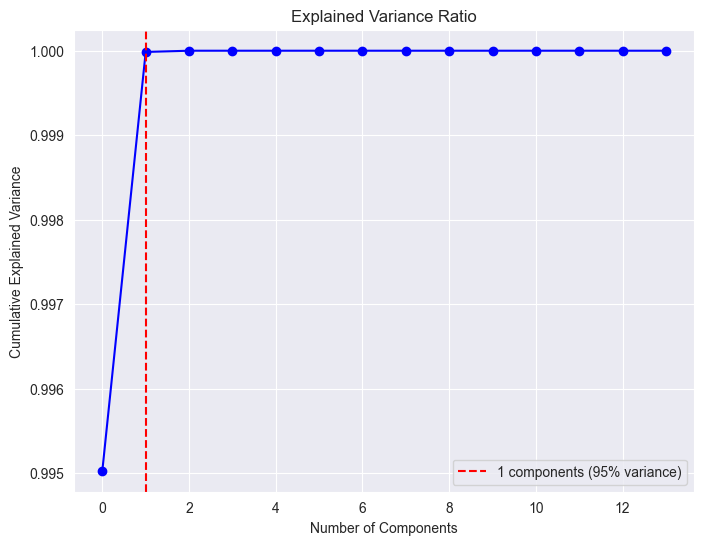

In [143]:
import matplotlib.pyplot as plt

# Visualize explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'{num_components} components (95% variance)')
plt.legend()
plt.grid(True)
plt.show()

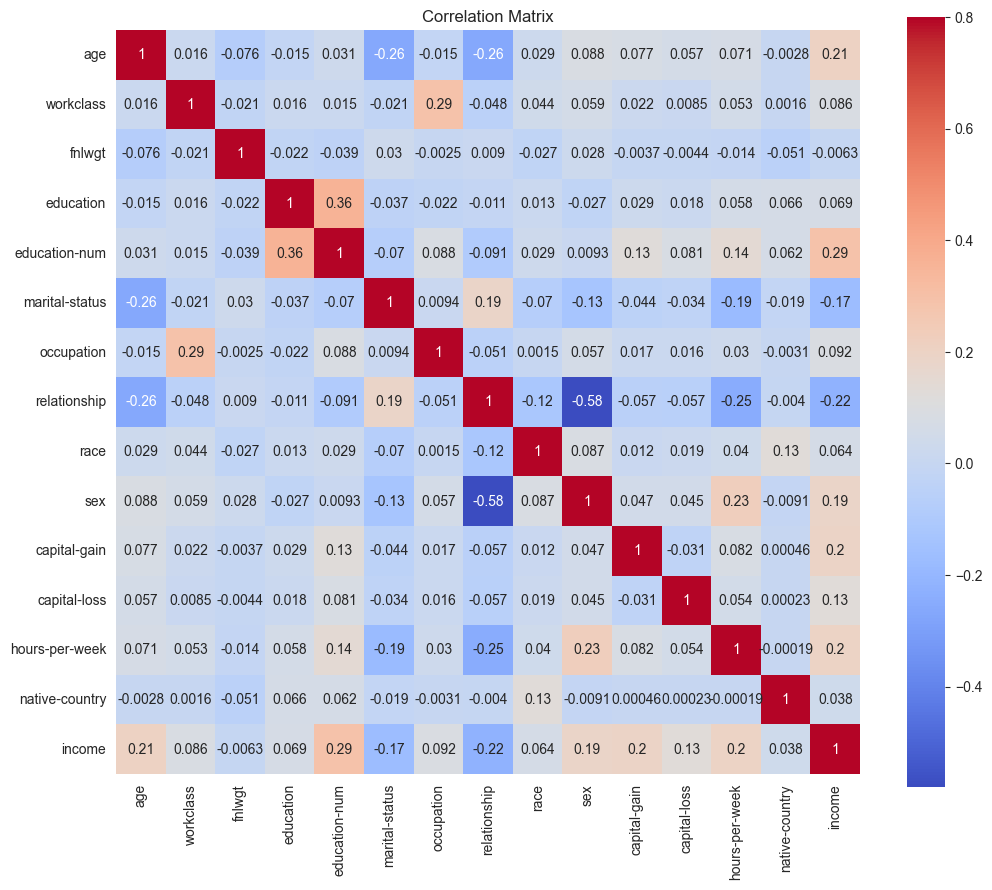

In [144]:
import seaborn as sns

# Visualize correlation matrix
correlation = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, vmax=0.8, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Education and Education-num is correlated

In [145]:
df.drop('education', axis=1, inplace=True)

# Split Data into Features and Target

In [146]:
original_income = df['income']

In [147]:
x = df.drop('income', axis=1)  # Features
y = df['income']  # Target variable (income)

# Data Testing and Training Split

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest Classification

In [149]:
rnd_forest = RandomForestClassifier()
rnd_forest.fit(x_train, y_train)

RandomForestClassifier()

In [150]:
rnd_forest_pred = rnd_forest.predict(x_test)

In [151]:
rf_accuracy = accuracy_score(y_test, rnd_forest_pred)
rf_report = classification_report(y_test, rnd_forest_pred)

In [152]:
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.5606883130185394


In [153]:
print("Random Forest Classifier Report:\n", rf_report)

Random Forest Classifier Report:
               precision    recall  f1-score   support

         0.0       0.61      0.83      0.70      4922
         1.0       0.42      0.18      0.26      2453
         2.0       0.51      0.54      0.52      1620
         3.0       0.22      0.09      0.12       768

    accuracy                           0.56      9763
   macro avg       0.44      0.41      0.40      9763
weighted avg       0.52      0.56      0.52      9763


In [154]:
rnd_forest_pred_df = pd.DataFrame({'income' : rnd_forest_pred})

In [155]:
print(rnd_forest_pred_df["income"].value_counts())

income
0.0    6667
2.0    1709
1.0    1089
3.0     298
Name: count, dtype: int64


In [156]:
df['income'].value_counts()

income
0.0    24698
1.0    12430
2.0     7839
3.0     3846
Name: count, dtype: int64

In [158]:
accuracy = accuracy_score(y_test, rnd_forest_pred)
print("Accuracy of the Random Forest Classifier:", accuracy)

Accuracy of the Random Forest Classifier: 0.5606883130185394


In [160]:
# Threshold for income classification
threshold = 0.5  # Assuming predictions are probabilities, we'll use 0.5 as the threshold

# Convert predicted probabilities to binary predictions based on the threshold
binary_predictions = (rnd_forest_pred > threshold).astype(int)

# Create a DataFrame for binary predictions
binary_predictions_df = pd.DataFrame({'income': binary_predictions})

# Count the number of individuals predicted to earn more than $50k per annum
print("Number of individuals predicted to earn more than $50k per annum:", binary_predictions_df['income'].sum())

Number of individuals predicted to earn more than $50k per annum: 3096


# Naive Bayes Classification

In [161]:
naive_bayes_classification = GaussianNB()
naive_bayes_classification.fit(x_train, y_train)

GaussianNB()

In [162]:
nb_pred = naive_bayes_classification.predict(x_test)

In [163]:
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred)

In [164]:
print("Naive Bayes Classifier Accuracy:", nb_accuracy)

Naive Bayes Classifier Accuracy: 0.5398955239168288


In [165]:
print("Naive Bayes Classifier Report:\n", nb_report)

Naive Bayes Classifier Report:
               precision    recall  f1-score   support

         0.0       0.55      0.93      0.69      4922
         1.0       0.63      0.08      0.14      2453
         2.0       0.44      0.29      0.35      1620
         3.0       0.33      0.02      0.04       768

    accuracy                           0.54      9763
   macro avg       0.49      0.33      0.31      9763
weighted avg       0.54      0.54      0.45      9763


In [36]:
# Check for duplicated entries in the DataFrame
num_duplicates = df.duplicated().sum()

if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicated entries in the DataFrame.")
else:
    print("No duplicated entries found in the DataFrame.")

There are 29 duplicated entries in the DataFrame.


In [37]:
# View a few of the duplicated entries in the DataFrame
duplicated_rows = df[df.duplicated()]
duplicated_rows.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


the checked duplicate entries in the DataFrame are not exactly duplicates

In [9]:
for i in df.columns:
    print('Column :', i, ", Missing Values:", df.loc[df[i] == "?", i].size)

df['income'].value_counts()

Column : age , Missing Values: 0
Column : workclass , Missing Values: 1836
Column : fnlwgt , Missing Values: 0
Column : education , Missing Values: 0
Column : education-num , Missing Values: 0
Column : marital-status , Missing Values: 0
Column : occupation , Missing Values: 1843
Column : relationship , Missing Values: 0
Column : race , Missing Values: 0
Column : sex , Missing Values: 0
Column : capital-gain , Missing Values: 0
Column : capital-loss , Missing Values: 0
Column : hours-per-week , Missing Values: 0
Column : native-country , Missing Values: 583
Column : income , Missing Values: 0


income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [10]:
import numpy as np

df.replace({'?': np.NaN}, inplace=True)
df.head(40)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [11]:
# check for missing values in the dataset
if df.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values in the dataset.")

There are missing values in the dataset.


In [12]:
for i in df.columns:
    print('Column :', i, ", Missing Values:", df.loc[df[i].isnull(), i].size)

df['income'].value_counts()

Column : age , Missing Values: 0
Column : workclass , Missing Values: 2799
Column : fnlwgt , Missing Values: 0
Column : education , Missing Values: 0
Column : education-num , Missing Values: 0
Column : marital-status , Missing Values: 0
Column : occupation , Missing Values: 2809
Column : relationship , Missing Values: 0
Column : race , Missing Values: 0
Column : sex , Missing Values: 0
Column : capital-gain , Missing Values: 0
Column : capital-loss , Missing Values: 0
Column : hours-per-week , Missing Values: 0
Column : native-country , Missing Values: 857
Column : income , Missing Values: 0


income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [13]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [15]:
# Fill null values for numerical columns in the DataFrame with the mean

# df.fillna(df.select_dtypes(include=['object']).mode(), inplace=True)

df.fillna(method = 'ffill', inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19504\528109137.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = 'ffill', inplace = True)


In [16]:
for i in df.columns:
    print('Column :', i, ", Missing Values:", df.loc[df[i] == "?", i].size)

df['income'].value_counts()

Column : age , Missing Values: 0
Column : workclass , Missing Values: 0
Column : fnlwgt , Missing Values: 0
Column : education , Missing Values: 0
Column : education-num , Missing Values: 0
Column : marital-status , Missing Values: 0
Column : occupation , Missing Values: 0
Column : relationship , Missing Values: 0
Column : race , Missing Values: 0
Column : sex , Missing Values: 0
Column : capital-gain , Missing Values: 0
Column : capital-loss , Missing Values: 0
Column : hours-per-week , Missing Values: 0
Column : native-country , Missing Values: 0
Column : income , Missing Values: 0


income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [17]:
df.head(40)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
# from sklearn.decomposition import PCA
# import numpy as np
# 
# # Exclude non-numeric columns before applying PCA
# numeric_columns = df.select_dtypes(include=['number']).columns
# df_numeric = df[numeric_columns]
# 
# # Apply PCA to determine duplicate columns
# pca = PCA()
# pca.fit(df_numeric)
# 
# # Get the cumulative sum of explained variance ratio
# cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# 
# # Identify duplicate columns based on explained variance
# threshold = 0.95
# duplicate_columns = df_numeric.columns[cumulative_variance >= threshold]
# 
# duplicate_columns

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [23]:
from sklearn.decomposition import PCA

# Apply PCA to determine columns with the same output
pca = PCA()
pca.fit(df)

PCA()

In [24]:
pca

PCA()

In [25]:
# Get the cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Identify columns with the same output based on explained variance
threshold = 0.95
redundant_columns = df.columns[cumulative_variance >= threshold]

redundant_columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [26]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.043261,-0.076628,-0.015058,0.030940,-0.263978,-0.006511,-0.263383,0.028421,0.088120,0.077229,0.056944,0.071558,-0.003022,0.205173
workclass,0.043261,1.000000,-0.024920,0.003399,0.005860,-0.017911,0.014153,-0.052274,0.050529,0.063055,0.030711,0.003932,0.035890,-0.006032,0.000887
fnlwgt,-0.076628,-0.024920,1.000000,-0.022570,-0.038761,0.029851,-0.000375,0.009092,-0.027062,0.027739,-0.003706,-0.004366,-0.013519,-0.058255,-0.006302
education,-0.015058,0.003399,-0.022570,1.000000,0.359668,-0.037417,-0.029272,-0.010758,0.013250,-0.027041,0.028928,0.017638,0.057659,0.075134,0.068523
education-num,0.030940,0.005860,-0.038761,0.359668,1.000000,-0.069992,0.086693,-0.090534,0.029239,0.009328,0.125146,0.080972,0.143689,0.089182,0.291074
marital-status,-0.263978,-0.017911,0.029851,-0.037417,-0.069992,1.000000,0.015916,0.187800,-0.070104,-0.127479,-0.043969,-0.033872,-0.185567,-0.018587,-0.171481
occupation,-0.006511,0.014153,-0.000375,-0.029272,0.086693,0.015916,1.000000,-0.047684,-0.001298,0.052049,0.018030,0.010620,0.013589,-0.003348,0.042124
relationship,-0.263383,-0.052274,0.009092,-0.010758,-0.090534,0.187800,-0.047684,1.000000,-0.117041,-0.579797,-0.056510,-0.057201,-0.250400,-0.006609,-0.223432
race,0.028421,0.050529,-0.027062,0.013250,0.029239,-0.070104,-0.001298,-0.117041,1.000000,0.086734,0.011581,0.018595,0.039694,0.119350,0.064000
sex,0.088120,0.063055,0.027739,-0.027041,0.009328,-0.127479,0.052049,-0.579797,0.086734,1.000000,0.047094,0.045480,0.228560,-0.003683,0.187216


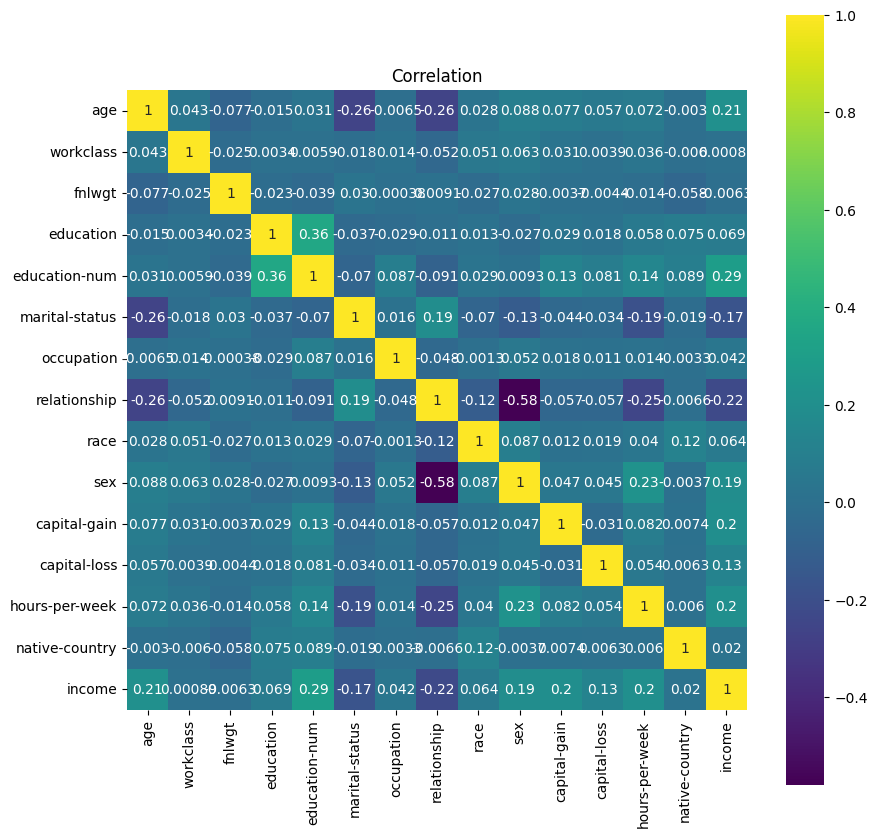

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation')
plt.show()

In [38]:
# Drop the columns 'education-num' and 'fnlwgt' from the DataFrame
df = df.drop(['education', 'fnlwgt'], axis = 1)
df.head(40)

AttributeError: 'NoneType' object has no attribute 'drop'

In [39]:
df.head(40)

AttributeError: 'NoneType' object has no attribute 'head'

In [8]:
# column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
#                 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [4]:
duplicated_rows = X[X.duplicated()]

In [5]:
# Print duplicate row count
print("Duplicate Row Count:", len(duplicated_rows))

Duplicate Row Count: 53


In [5]:
# Convert data to DataFrame
df = pd.DataFrame(adult.data.features, columns=adult.feature_names)
df['income'] = y

In [6]:
# Data preprocessing
# Assuming the 'income' column indicates whether income exceeds $50K/yr (1 if >50K, 0 otherwise)
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True) 

In [8]:
print(df.isnull().sum())

age                          0
fnlwgt                       0
education-num                0
capital-gain                 0
capital-loss                 0
                            ..
native-country_Vietnam       0
native-country_Yugoslavia    0
income_<=50K.                0
income_>50K                  0
income_>50K.                 0
Length: 103, dtype: int64


In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'State-gov'

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('income', axis=1), df['income'], test_size=0.2, random_state=42)

KeyError: "['income'] not found in axis"

In [ ]:
# Train Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

In [ ]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

In [ ]:
# Predictions
nb_predictions = nb_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

In [ ]:
# Evaluation
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))

In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))